In [54]:
import sympy as sy

import IPython
from IPython.display import display
from tbcontrol.symbolic import routh
import control as ct
import numpy as np
import matplotlib.pyplot as plt


def displayH(a1,a2='', a3='', a4='', a5='', a6='', a7='',):
    latex_a1 = sy.latex(a1)
    latex_a2 = sy.latex(a2)
    latex_a3 = sy.latex(a3)
    latex_a4 = sy.latex(a4)
    latex_a5 = sy.latex(a5)
    latex_a6 = sy.latex(a6)
    latex_a7 = sy.latex(a7)
    display( IPython.core.display.Math(latex_a1 + latex_a2 + latex_a3 + latex_a4 + latex_a5 + latex_a6 + latex_a7)  )

In [2]:
# 2

s = sy.Symbol("s")

a = sy.Symbol("alpha")
b = sy.Symbol("beta")
K = sy.Symbol("K")

C = K*(s/a+1)/(s/b+1)
P = (s**2+1)/(s**3-5*s+1)

Gyr = P*C/(1+P*C)
Gyd = P/(1+P*C)
Gyn = -P*C/(1+P*C)

displayH(sy.Symbol("G_{yr} ="),Gyr.simplify())
displayH(sy.Symbol("G_{yd} ="),Gyd.simplify())
displayH(sy.Symbol("G_{yn} ="),Gyn.simplify())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [3]:
# 3

s = sy.Symbol("s")

a = sy.Symbol("alpha")
b = sy.Symbol("beta")
Kp = sy.Symbol("K_p")

C = Kp
P = (s/a+1)/(s/b+1)

Gyr = P*C/(1+P*C)
Gyd = P/(1+P*C)
Gyn = -P*C/(1+P*C)

displayH(sy.Symbol("G_{yr} ="),Gyr.simplify())
displayH(sy.Symbol(r"S_{\alpha} ="),(sy.diff(Gyr,a)*a/Gyr).simplify())
displayH(sy.Symbol(r"S_{\beta} ="),(sy.diff(Gyr,b)*b/Gyr).simplify())

displayH(sy.Symbol("G_{yd} ="),Gyd.simplify())
displayH(sy.Symbol(r"S_{\alpha} ="),(sy.diff(Gyd,a)*a/Gyd).simplify())
displayH(sy.Symbol(r"S_{\beta} ="),(sy.diff(Gyd,b)*b/Gyd).simplify())

displayH(sy.Symbol("G_{yn} ="),Gyn.simplify())
displayH(sy.Symbol(r"S_{\alpha} ="),(sy.diff(Gyn,a)*a/Gyn).simplify())
displayH(sy.Symbol(r"S_{\beta} ="),(sy.diff(Gyn,b)*b/Gyn).simplify())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
# 4

s = sy.Symbol("s")

a = sy.Symbol("a")
Kp = sy.Symbol("K_p")
Ki = sy.Symbol("K_I")

C = Kp+Ki/s
P = 1/(s/a+1)

D,N = sy.fraction((1+P*C).simplify())

p = sy.Poly(D, s)
table = routh(p)
displayH(table)

<IPython.core.display.Math object>

In [5]:
# 4

s = sy.Symbol("s")

a = sy.Symbol("a")
Kp = sy.Symbol("K_P")
Ki = sy.Symbol("K_I")
Kd = sy.Symbol("K_D")

C1 = Kp
C2 = Kp+Ki/s+Kd*s
P = (s-1)/s**2

D1,N1 = sy.fraction((1+P*C1).factor())
D2,N2 = sy.fraction((1+P*C2).factor())

p1 = sy.Poly(D1, s)
table1 = routh(p1)
displayH(table1)

p2 = sy.Poly(D2, s)
table2 = routh(p2)
displayH(table2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [55]:
# 6

s = sy.Symbol("s")

a = sy.Symbol("a")
Kp = sy.Symbol("K_P")
Ki = sy.Symbol("K_I")

C1 = Kp
C2 = Kp+Ki/s
P = (s-1)/(s**2+s+1)

D1,N1 = sy.fraction((1+P*C1).factor())
D2,N2 = sy.fraction((1+P*C2).factor())



signal    | source                        | destination
--------------------------------------------------------------------------
y_m       | Noise                         | output, Error                 
n         | input                         | Noise                         
u         | C                             | Disturbances                  
r         | input                         | Error                         
d         | input                         | Disturbances                  
e         | Error                         | output, C                     
y         | P                             | Noise                         
u_m       | Disturbances                  | P                             


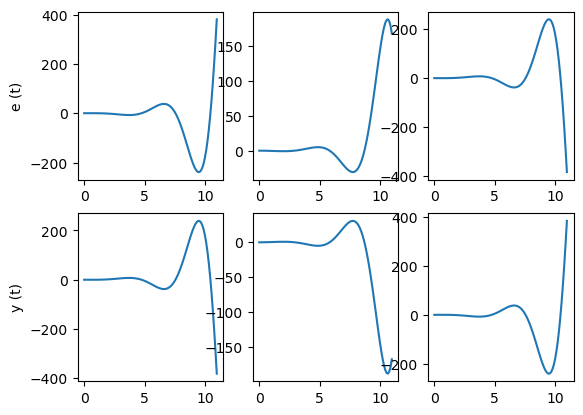

In [180]:
Kp = -1
Ki = 2
Kd = 2

error_blk = ct.summing_junction(inputs=['r', '-y_m'], output='e',name='Error')
C = ct.tf([Kp,Ki,Kd], [1,0,0], inputs='e', outputs='u', name='C')
disturbance_blk = ct.summing_junction(inputs=['u', 'd'], output='u_m',name='Disturbances')
P = ct.tf(1,[1,1,1], inputs='u_m', outputs='y', name='P')
measurement_blk = ct.summing_junction(inputs=['y', 'n'], output='y_m',name='Noise')

system = ct.interconnect([error_blk,C,disturbance_blk, P,measurement_blk], inputs=['r','d','n'], outputs=['e','y_m'])
system.connection_table(show_names=True)

t,y = ct.step_response(system)

A,B,N = np.shape(y)
fig,axes = plt.subplots(A,B)

for i in range(A):
    for j in range(B):
        axes[i,j].plot(t,y[i,j])
axes[0,0].set_ylabel("e (t)")
axes[1,0].set_ylabel("y (t)")
plt.show()